# Predict Body Fat Percentage - Male

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Get the data
First download and import the dataset using pandas. Then identify the input and output parameters.

In [136]:
#loading the dataset
df=pd.read_csv('WomenDataSet.csv')
df

,Obs,Fat,Weight,Height,BMI,Age,Neck,Chest,Calf,Biceps,Hips,Waist,Forearm,PThigh,MThigh,DThigh,Wrist,Knee,Elbow,Ankle
0,1,23.07,49.4424,1.61290,19.006,22,28.8,76.1,32.4,25.0,90.2,62.8,21.0,52.5,49.2,37.0,15.0,33.0,22.0,19.7
1,2,29.50,60.7824,1.57480,24.509,22,31.2,87.3,33.2,26.8,94.0,68.0,23.2,58.5,50.0,39.0,15.8,34.6,23.0,22.0
2,3,26.99,63.0504,1.61798,24.085,21,30.8,83.7,32.5,27.8,94.0,71.0,21.8,55.5,51.0,38.0,14.4,35.0,24.3,20.1
3,4,20.25,53.0712,1.68148,18.771,20,30.0,78.0,34.2,23.8,90.5,63.5,21.5,52.5,48.0,37.0,14.5,35.0,22.6,20.0
4,5,19.95,59.4216,1.73228,19.802,20,32.5,84.2,35.2,24.2,93.2,65.0,21.0,55.5,50.0,39.5,14.8,33.0,24.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,30.40,59.8752,1.56210,24.537,23,31.3,89.0,36.0,28.0,98.5,71.0,24.5,62.5,56.0,42.0,16.3,36.2,24.0,21.0
180,181,7.47,48.5352,1.57480,19.571,21,29.5,79.0,34.0,25.0,89.0,62.5,22.0,52.5,49.0,37.0,15.5,33.0,22.0,20.0
181,182,11.98,51.7104,1.57480,20.851,20,31.5,81.5,32.5,27.5,90.0,61.5,22.5,53.0,49.5,36.0,15.0,32.0,22.5,19.5
182,183,11.24,50.8032,1.65100,18.638,22,30.5,85.0,32.0,24.0,88.0,64.0,21.5,51.0,45.0,33.0,15.0,32.0,22.0,19.5


### Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict. Th X contains input features and y variable contains the label also known as output which is the Body Fat Percentage.

In [139]:
#splitting to input and output
X = df.drop(["Fat",'Obs',' BMI'],axis=1)
y=df['Fat']

### Clean the data

This dataset does not contain any null or unknown values and measuring units are constant throughout. Therefore there's no need to clean the dataset.

### Split the data into training and test sets

Now, split the dataset into a training set and a test set. We will use the test set in the final evaluation of our models.

In [140]:
from sklearn.model_selection import train_test_split #this function returns a tuple
#splitting data
train_features, test_features,train_labels,test_labels =train_test_split(X, y, test_size=0.2)

### Inspect the data

Review the joint distribution of a few pairs of columns from the training set.



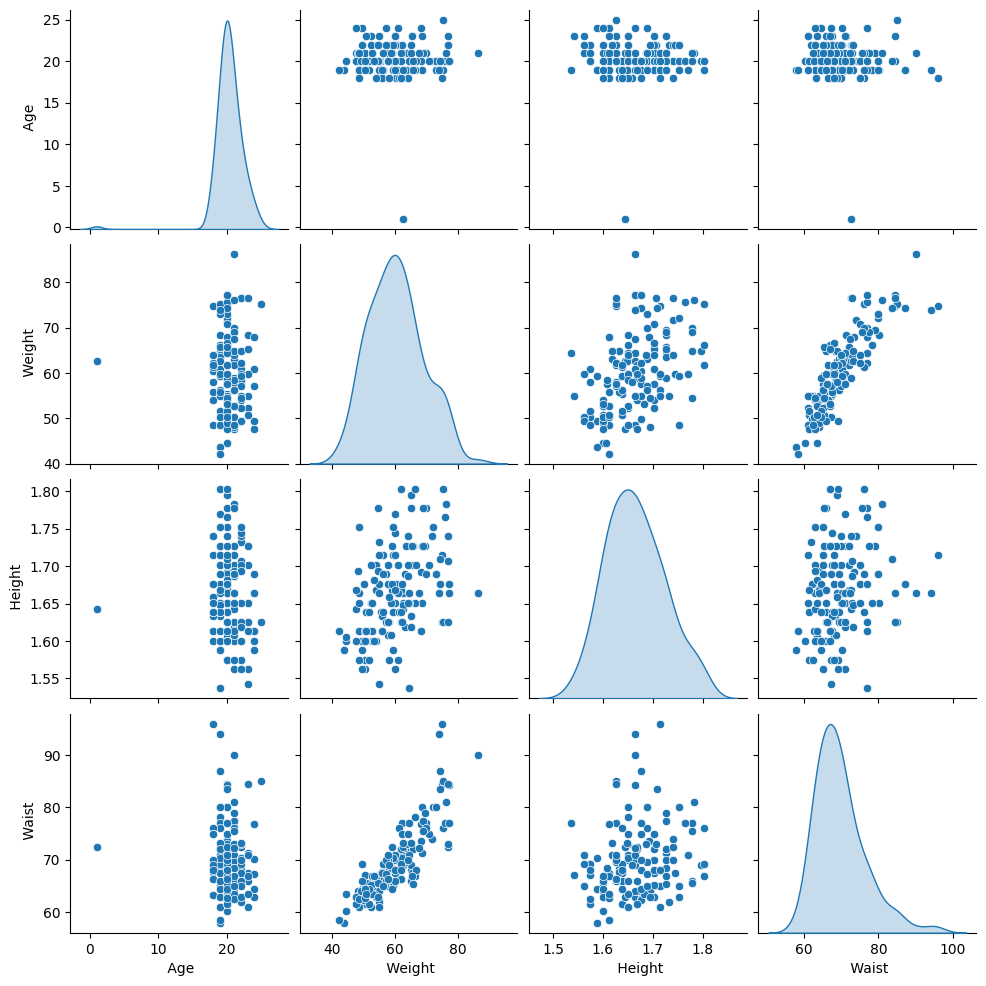

In [142]:
sns.pairplot(train_features[[' Age', ' Weight', ' Height', ' Waist']], diag_kind='kde')

Let's also check the overall statistics. Note how each feature covers a very different range:

In [143]:
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,147.0,60.276343,8.590970,42.1848,53.9784,59.8752,65.0916,86.1840
Height,147.0,1.665371,0.058915,1.5367,1.6256,1.6637,1.7018,1.8034
Age,147.0,20.292517,2.187170,1.0000,19.0000,20.0000,21.0000,25.0000
Neck,147.0,31.538776,1.586780,26.0000,30.5000,31.5000,32.5000,36.0000
Chest,147.0,85.074830,6.855493,43.0000,82.4500,85.0000,88.5000,100.0000
Calf,147.0,35.713605,3.782017,25.5000,34.0000,35.5000,37.5000,66.0000
Biceps,147.0,26.689796,2.468257,20.5000,25.0000,26.8000,28.2000,34.5000
Hips,147.0,97.063265,6.422212,82.5000,92.5000,97.0000,102.0000,115.0000
Waist,147.0,69.795238,6.798815,58.0000,65.0000,68.3000,72.7500,96.0000
Forearm,147.0,23.514286,1.552285,20.0000,22.5000,23.5000,24.5000,29.0000


## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are:

It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable. And it also make the preprocessing process more efficient.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into the model.

The first step is to create the layer:

In [144]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`:

In [145]:
normalizer.adapt(np.array(train_features))

Calculate the mean and variance, and store them in the layer:

In [146]:
print(normalizer.mean.numpy())

[[60.276  1.665 20.293 31.539 85.075 35.714 26.69  97.063 69.795 23.514
  57.49  51.453 39.405 15.654 35.774 23.821 21.36 ]]


When the layer is called, it returns the input data, with each feature independently normalized:

In [147]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[52.62  1.6  21.   30.6  84.5  32.6  26.5  94.   66.   22.5  54.   47.
  37.   14.5  32.6  22.5  21.  ]]

Normalized: [[-0.89 -1.11  0.32 -0.59 -0.08 -0.83 -0.08 -0.48 -0.56 -0.66 -0.76 -1.07
  -0.65 -1.23 -1.45 -0.82 -0.27]]


## Linear regression

### Linear regression with one variable

Begin with a single-variable linear regression to predict `'BodyFat'` from `'Weight'`.

Training a model with `tf.keras` typically starts by defining the model architecture. Here we've used a `tf.keras.Sequential` model.

There are two steps in your single-variable linear regression model:

- Normalize the `'Weight'` input features using the `tf.keras.layers.Normalization` preprocessing layer.
- Apply a linear transformation ($y = mx+b$) to produce 1 output using a linear layer (`tf.keras.layers.Dense`).

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First, create a NumPy array made of the `'Weight'` features. Then, instantiate the `tf.keras.layers.Normalization` and fit its state to the `Weight` data:

In [148]:
weight = np.array(train_features[' Weight'])

weight_normalizer = layers.Normalization(input_shape=[1,], axis=None)
weight_normalizer.adapt(weight)

Build the Keras Sequential model:

In [149]:
weight_model = tf.keras.Sequential([
    weight_normalizer,
    layers.Dense(units=1)
])

weight_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_36 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________




Run the untrained model on the first 10 'weight' values. The output won't be good, but notice that it has the expected shape of `(10, 1)`:

In [150]:
weight_model.predict(weight[:10])

1/1 [==============================] - 0s 66ms/step


array([[ 1.338],
       [-0.009],
       [-1.435],
       [-0.801],
       [ 0.942],
       [-2.544],
       [-1.99 ],
       [ 0.466],
       [ 1.655],
       [ 2.051]], dtype=float32)

Once the model is built, configure the training procedure using the Keras `Model.compile` method. The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`mean_absolute_error`) and how (using the `tf.keras.optimizers.Adam`).

In [151]:
weight_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Use Keras `Model.fit` to execute the training for 100 epochs:

In [153]:
%%time
history = weight_model.fit(
    train_features[' Weight'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.27 s, sys: 147 ms, total: 5.42 s
Wall time: 11.4 s


Visualize the model's training progress using the stats stored in the `history` object:

In [154]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.405579,2.792745,95
96,3.404818,2.794715,96
97,3.404786,2.804553,97
98,3.406564,2.814672,98
99,3.404937,2.810626,99


In [155]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

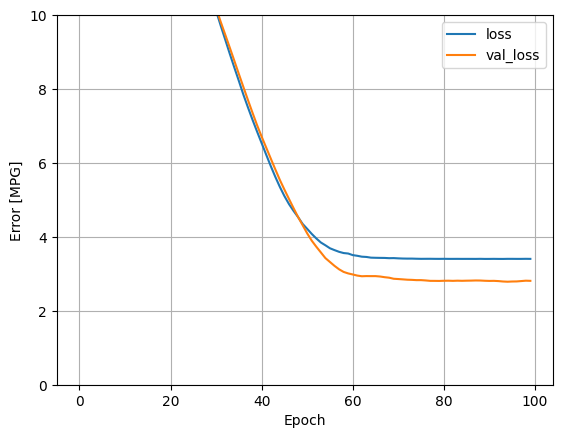

In [156]:
plot_loss(history)

Collect the results on the test set for later:

In [158]:
test_results = {}

test_results['weight_model'] = weight_model.evaluate(
    test_features[' Weight'],
    test_labels, verbose=0)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [159]:
x = tf.linspace(0.0, 250, 251)
y = weight_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [161]:
def plot_weight(x, y):
  plt.scatter(train_features[' Weight'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(' Weight')
  plt.ylabel('Fat')
  plt.legend()

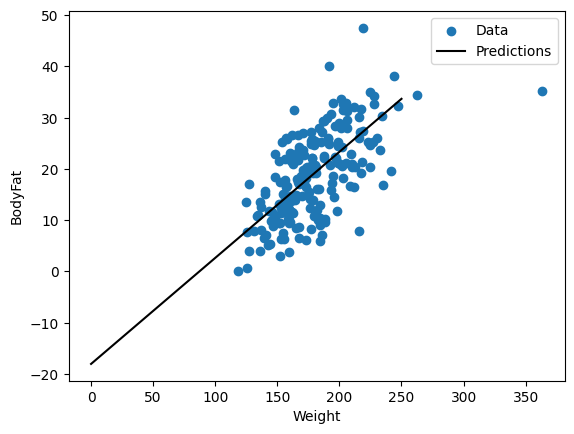

In [ ]:
plot_weight(x, y)

### Linear regression with multiple inputs

We can use an almost identical setup to make predictions based on multiple inputs. This model still does the same $y = mx+b$ except that $m$ is a matrix and $b$ is a vector.

Created a two-step Keras Sequential model again with the first layer being `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) we defined earlier and adapted to the whole dataset:

In [169]:
linear_model = tf.keras.Sequential([
    layers.Input(shape=(1, 17)),
    normalizer,
    layers.Dense(units=1)
])

linear_female_model = tf.keras.models.Sequential(linear_model.layers[1:])

When calling `Model.predict` on a batch of inputs, it produces `units=1` outputs for each example:

In [170]:
linear_female_model.predict(train_features[:10])

1/1 [==============================] - 0s 60ms/step


array([[ -2.706],
       [ -2.638],
       [ -6.646],
       [ -2.778],
       [  9.664],
       [-13.299],
       [ -8.195],
       [ -2.193],
       [  0.304],
       [ -0.153]], dtype=float32)

Configure the model with Keras `Model.compile` and train with `Model.fit` for 100 epochs:

In [172]:
linear_female_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [173]:
%%time
history = linear_female_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.09 s, sys: 149 ms, total: 5.24 s
Wall time: 7.33 s


Using all the inputs in this regression model achieves a much lower training and validation error than the `weight_model`, which had one input:

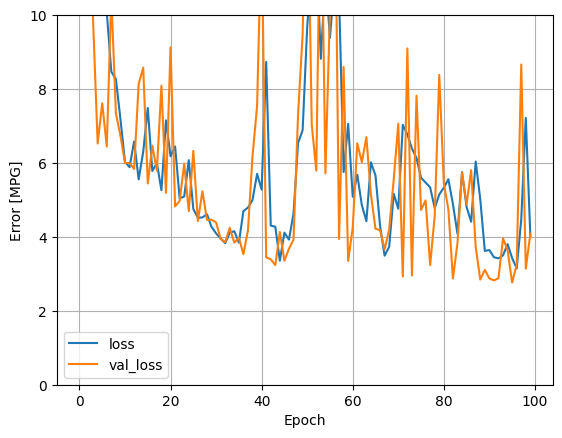

In [174]:
plot_loss(history)

Collect the results on the test set for later:

In [176]:
test_results={}

test_results['linear_female_model'] = linear_female_model.evaluate(
    test_features, test_labels, verbose=0)
test_results

{'linear_female_model': 3.4650471210479736}

2/2 [==============================] - 0s 6ms/step


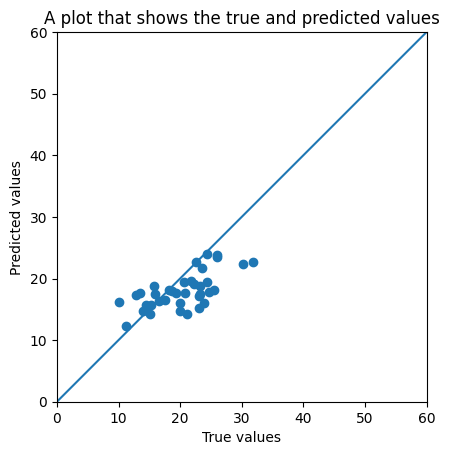

In [177]:
y_pred = linear_female_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])

## Regression with a deep neural network (DNN)

In the previous section, we implemented two linear models for single and multiple inputs.

Here, we will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer, as before (with `weight_normalizer` for a single-input model and `normalizer` for a multiple-input model).
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

Both models will use the same training procedure, so the `compile` method is included in the `build_and_compile_model` function below.

In [178]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### Regression using a DNN and a single input

Create a DNN model with only `'Weight'` as input and `weight_normalizer` (defined earlier) as the normalization layer:

In [179]:
dnn_weight_model = build_and_compile_model(weight_normalizer)

This model has quite a few more trainable parameters than the linear models:

In [180]:
dnn_weight_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_42 (Dense)            (None, 64)                128       
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model with Keras `Model.fit`:

In [182]:
%%time
history = dnn_weight_model.fit(
    train_features[' Weight'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.04 s, sys: 152 ms, total: 6.2 s
Wall time: 11.5 s


This model does slightly better than the linear single-input `weight_model`:

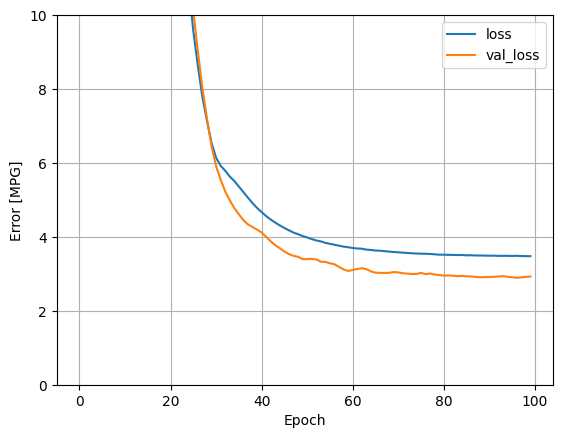

In [183]:
plot_loss(history)

this model takes advantage of the nonlinearity provided by the hidden layers:

In [184]:
x = tf.linspace(0.0, 250, 251)
y = dnn_weight_model.predict(x)

8/8 [==============================] - 0s 2ms/step


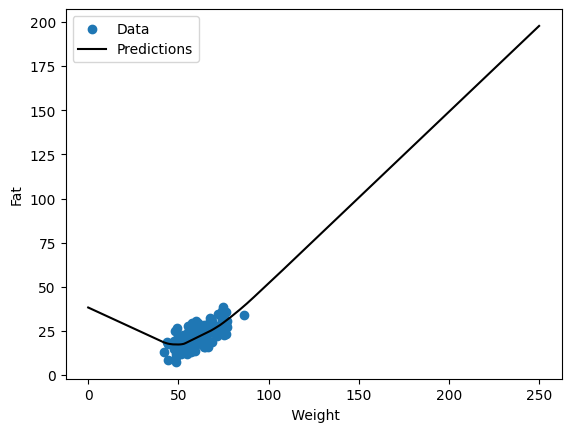

In [185]:
plot_weight(x, y)

Collect the results on the test set for later:

In [186]:
test_results['dnn_weight_model'] = dnn_weight_model.evaluate(
    test_features[' Weight'], test_labels,
    verbose=0)

In [187]:
test_results

{'linear_female_model': 3.4650471210479736,
 'dnn_weight_model': 3.4198672771453857}

### Regression using a DNN and multiple inputs

Repeat the previous process using all the inputs. The model's performance slightly improves on the validation dataset.

In [189]:
dnn_female_model = build_and_compile_model(normalizer)
dnn_female_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  multiple                 35        
 ion)                                                            
                                                                 
 dense_48 (Dense)            (None, 64)                1152      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,412
Trainable params: 5,377
Non-trainable params: 35
_________________________________________________________________


In [190]:
%%time
history = dnn_female_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.03 s, sys: 190 ms, total: 6.22 s
Wall time: 8.63 s


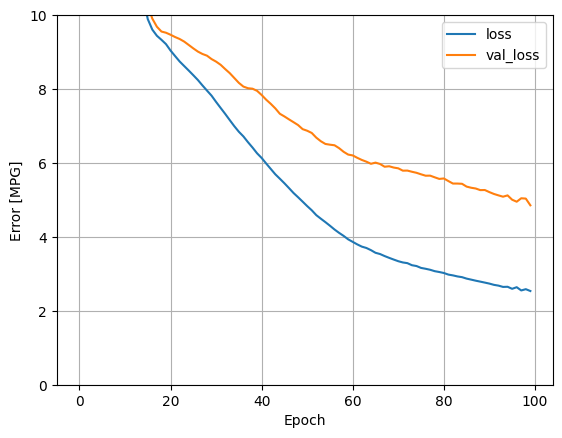

In [191]:
plot_loss(history)

2/2 [==============================] - 0s 6ms/step


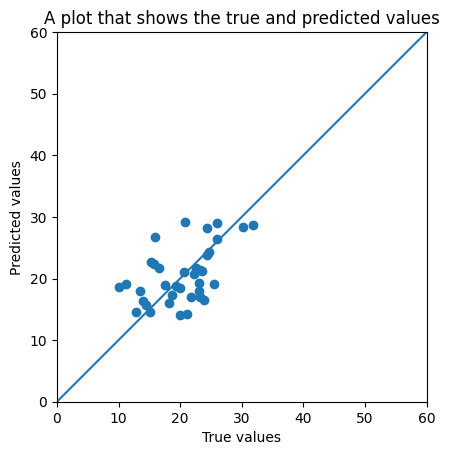

In [192]:
y_pred = dnn_female_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])

Collect the results on the test set:

In [193]:
test_results['dnn_female_model'] = dnn_female_model.evaluate(test_features, test_labels, verbose=0)

In [194]:
test_results

{'linear_female_model': 3.4650471210479736,
 'dnn_weight_model': 3.4198672771453857,
 'dnn_female_model': 3.74932861328125}

## Building a Multilayer Neural Network with Tensorflow Keras. 

In [195]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#rescale the data to be robust to outliers
scaler = RobustScaler()
scaler.fit(train_features)
X_train = scaler.transform(train_features)
X_test = scaler.transform(test_features)


#built the neural network architecture
NNF_model = Sequential()
NNF_model.add(Dense(15, input_dim=17, activation='relu'))
NNF_model.add(Dense(1, activation='linear'))

In [196]:
NNF_model.compile(loss='mae', optimizer='adam')

In [199]:
#train the neural network on the train dataset
history = NNF_model.fit(train_features, train_labels, epochs=200, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 0s 12ms/step - loss: 4.1468 - val_loss: 4.0036
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 4.1461 - val_loss: 4.0265
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 4.1425 - val_loss: 4.0117
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 4.1436 - val_loss: 4.0023
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 4.1341 - val_loss: 3.9657
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 4.1323 - val_loss: 3.9512
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 4.1328 - val_loss: 3.9130
Epoch 8/200
4/4 [==============================] - 0s 11ms/step - loss: 4.1389 - val_loss: 3.8950
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 4.1272 - val_loss: 3.9291
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 4.1277 - val_loss: 3.9890
Epoch 11/200
4/4 [=

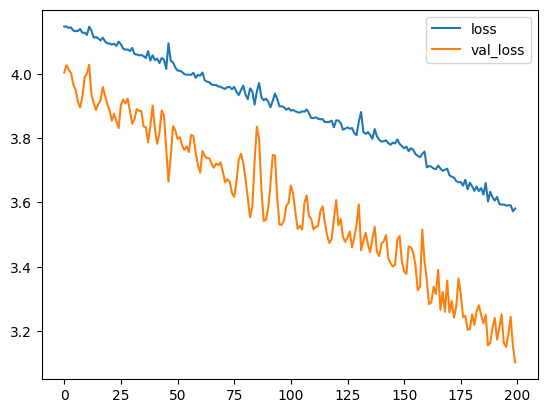

In [200]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [201]:
#evaluate the model
NNF_model.evaluate(test_features, test_labels, batch_size=128)

1/1 [==============================] - 0s 29ms/step - loss: 3.5772


3.577169418334961

2/2 [==============================] - 0s 9ms/step


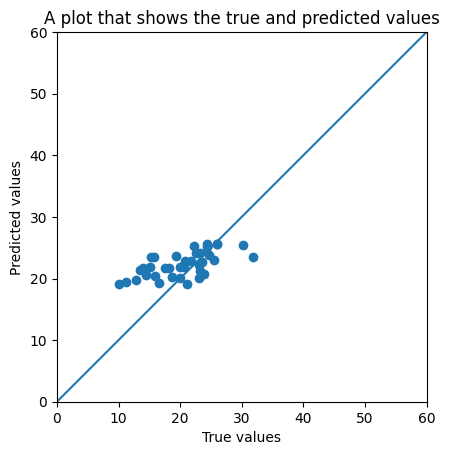

In [202]:
y_pred = NNF_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])

In [203]:
test_results['NNF_model'] = NNF_model.evaluate(test_features, test_labels, verbose=0)

In [204]:
test_results

{'linear_female_model': 3.4650471210479736,
 'dnn_weight_model': 3.4198672771453857,
 'dnn_female_model': 3.74932861328125,
 'NNF_model': 3.577169895172119}

In [205]:
#Improving the Model by Adding More Hidden Layers
#built the neural network architecture

NNF2_model = Sequential()
NNF2_model.add(Dense(13, input_dim=17, activation='relu'))
NNF2_model.add(Dense(9, activation='relu'))
NNF2_model.add(Dense(5, activation='relu'))
NNF2_model.add(Dense(1, activation='linear'))

NNF2_model.compile(loss='mae', optimizer='adam')

#train the neural network on the train dataset
history = NNF2_model.fit(train_features, train_labels, epochs=200, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 2s 66ms/step - loss: 19.9894 - val_loss: 15.9293
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 13.8141 - val_loss: 10.5387
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 8.6560 - val_loss: 6.3230
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 4.7593 - val_loss: 3.6043
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 4.0149 - val_loss: 4.5771
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 4.9873 - val_loss: 4.7706
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 4.7619 - val_loss: 3.9284
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 4.0781 - val_loss: 3.5979
Epoch 9/200
4/4 [==============================] - 0s 13ms/step - loss: 3.7969 - val_loss: 3.9426
Epoch 10/200
4/4 [==============================] - 0s 14ms/step - loss: 3.9894 - val_loss: 4.0616
Epoch 11/200
4/

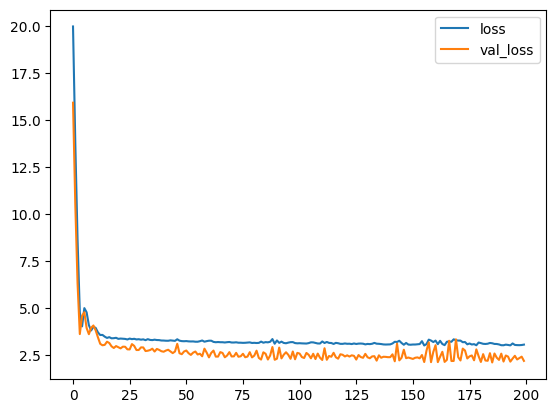

In [206]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [207]:
 #evaluate the model
NNF2_model.evaluate(test_features, test_labels, batch_size=128)

1/1 [==============================] - 0s 37ms/step - loss: 3.3187


3.318666934967041

2/2 [==============================] - 0s 4ms/step


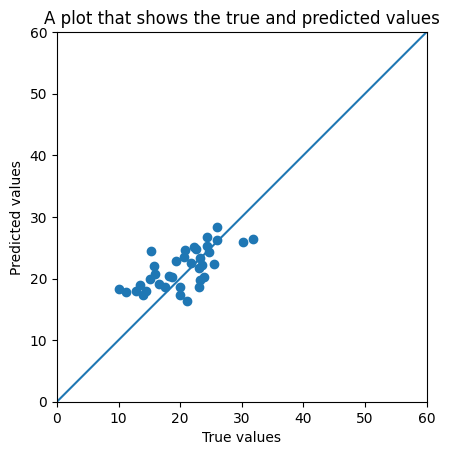

In [208]:
y_pred = NNF2_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])

In [209]:
test_results['NNF2_model'] = NNF2_model.evaluate(test_features, test_labels, verbose=0)

##Performance

Since all models have been trained, we can review their test set performance:

In [210]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_female_model,3.465047
dnn_weight_model,3.419867
dnn_female_model,3.749329
NNF_model,3.577170
NNF2_model,3.318667


### Make predictions

As we can see the most accurate model is the Neural network model. We can now make predictions with the `NN_model` on the test set using Keras `Model.predict` and review the loss:

2/2 [==============================] - 0s 10ms/step


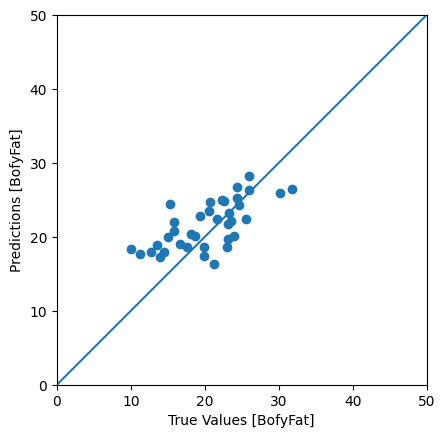

In [212]:
test_predictions = NNF2_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [BofyFat]')
plt.ylabel('Predictions [BofyFat]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It appears that the model predicts reasonably well.

Now, check the error distribution:

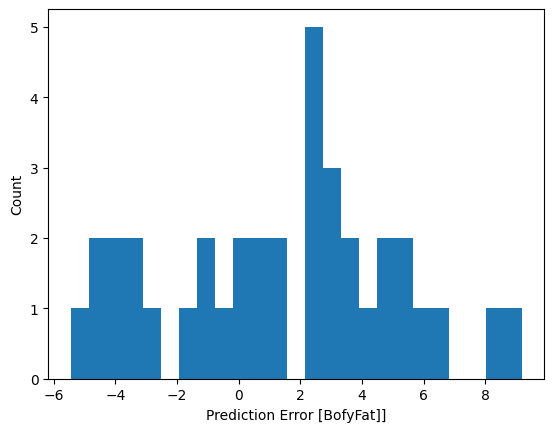

In [214]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [BofyFat]]')
_ = plt.ylabel('Count')

In [223]:
test_predictions = NNF2_model.predict([[60.7824,1.5748,22,31.2,87.3,33.2,26.8,94,68,23.2,58.5,50,39,15.8,34.6,23,22]]).flatten()

1/1 [==============================] - 0s 40ms/step


In [224]:
test_predictions

array([22.93], dtype=float32)

##saving the model as tflite file

In [225]:
# save your model
NNF2_model.save('NNF2_model.h5')

In [228]:
# load the saved NNmodel
NNF2_loaded_model = tf.keras.models.load_model('NNF2_model.h5')


In [230]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(NNF2_loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('NNF2_model.tflite', 'wb') as f:
  f.write(tflite_model)

##loading and testing the saved tflite model

In [231]:

##loading the saved tflite model
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="NNF2_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
interpreter.resize_tensor_input(input_details[0]['index'], (1, 17))

output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
input_shape = input_details[0]['shape']


In [234]:
data = [60.7824,1.5748,22,31.2,87.3,33.2,26.8,94,68,23.2,58.5,50,39,15.8,34.6,23,22]
# Create a NumPy array with shape (1, 17)
arrUUU = np.array([data],dtype=np.float32)


In [235]:
# Set the input tensor
interpreter.set_tensor(input_details[0]['index'],arrUUU)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

In [236]:
output_data

array([[22.93]], dtype=float32)

## Conclusion

This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

- Mean squared error (MSE) (`tf.keras.losses.MeanSquaredError`) and mean absolute error (MAE) (`tf.keras.losses.MeanAbsoluteError`) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
- Similarly, evaluation metrics used for regression differ from classification.
- When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
- Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial. Visit the [Overfit and underfit](overfit_and_underfit.ipynb) tutorial for more help with this.